# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Цель исследования - установить параметры, влияющие на стоимость квартиры

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [4]:
print(data['ceiling_height'])


0        2.70
1         NaN
2         NaN
3         NaN
4        3.03
         ... 
23694    3.70
23695     NaN
23696     NaN
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23699, dtype: float64


Описание данных
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах (м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — общая площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении


In [5]:
data.describe()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

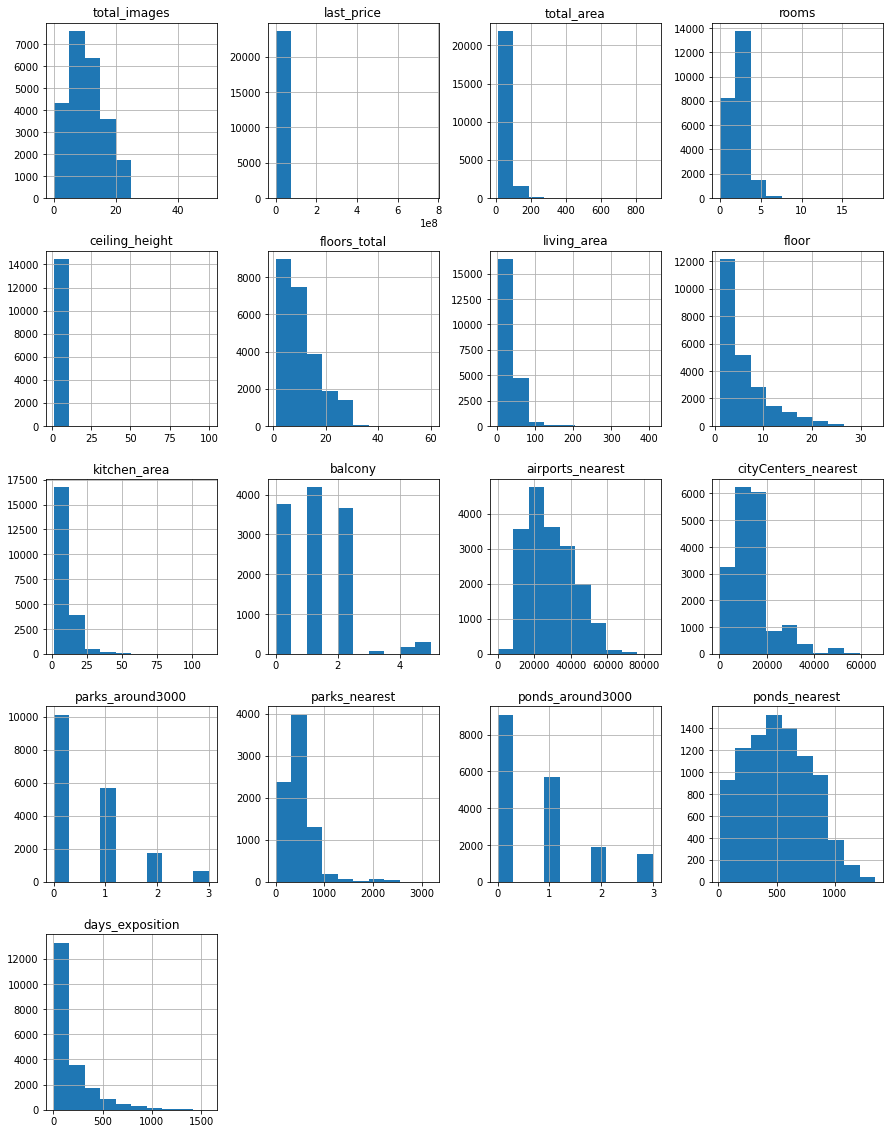

In [6]:
 data.hist(figsize=(15, 20))

### Предобработка данных

Доступно два вида данных. 1 это которые ввели сами пользователи и 2 которые получены автоматически на основе данных с карт

Всего 23699 объявления. Однако есть проблемы с данными: нарушения в стиле названий столбцов, пропуски.
Кроме того, нужно проверить данные на аномалии и дубликаты.



Заменим стиль заголовкам

In [7]:
data = data.rename(columns = {'cityCenters_nearest':'city_centers_nearest',
                            'parks_around3000':'parks_around_3000',
                            'ponds_around3000':'ponds_around_3000'})

In [8]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Посчитаем сколько в таблице пропущенных значений.

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony'] = data['balcony'].fillna(0) 
data['balcony'] = data['balcony'].astype('int') 
data['last_price'] = data['last_price'].astype('int')

In [11]:
data.sort_values(by='last_price').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,False,...,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
17456,7,430000,30.4,2019-04-22T00:00:00,1,NaN,2.0,16.0,1,False,...,6.0,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14911,5,430000,54.0,2018-06-26T00:00:00,2,NaN,3.0,NaN,3,False,...,NaN,0,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16274,18,440000,40.0,2018-07-10T00:00:00,1,NaN,5.0,NaN,1,False,...,NaN,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17676,0,450000,36.5,2018-02-01T00:00:00,1,NaN,5.0,17.3,4,False,...,8.5,1,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0


Вряд ли 12 190 руб. будет стоить квартира в Санкт-Петербурге площадью 109 кв.м. 
Скорее всего, цена указана не в рублях, а в тысячах рублей. 
Что касается следующих значений, они выглядят вполне реальными.

Заменим значение 12 190 на 12 190 000.

In [12]:
data['last_price'] = data['last_price'].replace(12190, 12190000)

In [13]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S') 

In [14]:
#посмотрим период в выборке
data.agg({'first_day_exposition':['min','max']})

,first_day_exposition
min,2014-11-27
max,2019-05-03


In [15]:
  #idem po propuskam dalshe
data.sort_values(by = 'locality_name')['locality_name'].unique()    

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [16]:
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')


In [17]:
data.loc[(data['locality_name'].isna()) & 
         (data['city_centers_nearest'] < 17000), 'locality_name'] = 'Санкт-Петербург'

col_list = ['city_centers_nearest', 'airports_nearest'] 
data_same_house = data.loc[data.duplicated(col_list, keep=False)].dropna(subset=col_list) 
locality_name_first = data_same_house.groupby(col_list)['locality_name'].transform('first')
data['locality_name'] = data['locality_name'].fillna(locality_name_first)
data.dropna(subset=['locality_name'], inplace=True)
data['locality_name'].isna().sum() 

0

In [18]:
data.dropna(subset=['floors_total'], inplace=True) 
data['floors_total'] = data['floors_total'].astype('int')
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9110
floors_total                0
living_area              1867
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2228
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around_3000        5500
parks_nearest           15557
ponds_around_3000        5500
ponds_nearest           14542
days_exposition          3171
dtype: int64

In [19]:
known_distance = data[~data['city_centers_nearest'].isna()]['locality_name'].unique()
data = data[~((data['city_centers_nearest'].isna()) & (data['locality_name'].isin(known_distance)))]
data['city_centers_nearest'].isna().sum() 

5432

In [20]:
data.loc[(data['kitchen_area'].isna()) & 
         ((data['studio'] == True) | (data['open_plan'] == True)), 'kitchen_area'] = 0
kitchen_ratio_median = (
    data.groupby('rooms')['kitchen_area'].transform('median') / 
    data.groupby('rooms')['total_area'].transform('median')
)
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_ratio_median * data['total_area']).round(2)
data['kitchen_area'].isna().sum()

0

In [21]:
living_ratio_median = (
    data.groupby('rooms')['living_area'].transform('median') / 
    data.groupby('rooms')['total_area'].transform('median')
)
data['living_area'] = data['living_area'].fillna(living_ratio_median * data['total_area']).round(2)
data['living_area'].isna().sum()

0

In [22]:
data.duplicated().sum() 

0

In [23]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9076
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5456
city_centers_nearest     5432
parks_around_3000        5432
parks_nearest           15489
ponds_around_3000        5432
ponds_nearest           14473
days_exposition          3134
dtype: int64

In [24]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].isna().sum()

0

In [25]:
print(data['ceiling_height'].unique())

[  2.7    2.65   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     3.2    2.61   3.25   3.45   2.77   2.85   2.64
   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84   3.1
   2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.     2.58
   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6    2.92
   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53   2.74
   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82   3.54
   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9    3.18
   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83   3.52
   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19   3.24
   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37   3.09
   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68   3.22
   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63   3.32
  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.28   3.04   4.45
   5.5  

In [26]:
def change_ceiling(max_height):
    if max_height <= 2.3 or max_height >= 5:
        max_height = data['ceiling_height'].median()
    return max_height

data['ceiling_height'] = data['ceiling_height'].apply(change_ceiling)

In [27]:
data['ceiling_height'].value_counts().sort_index().tail(15)

4.10     3
4.14     1
4.15     1
4.19     2
4.20    10
4.25     1
4.30     1
4.37     1
4.40     3
4.45     2
4.50     7
4.65     1
4.70     2
4.80     1
4.90     1
Name: ceiling_height, dtype: int64

In [28]:
print(data['ceiling_height'].unique())

[2.7  2.65 3.03 2.5  2.67 2.56 3.05 2.75 2.6  2.9  2.8  2.55 3.   3.2
 2.61 3.25 3.45 2.77 2.85 2.64 2.57 4.15 3.5  3.3  2.71 4.   2.47 2.73
 2.84 3.1  2.34 3.4  3.06 2.72 2.54 2.51 2.78 2.76 2.58 3.7  2.52 2.87
 2.66 2.59 2.45 3.6  2.92 3.11 3.13 3.8  3.15 3.55 3.16 3.62 3.12 2.53
 2.74 2.96 2.46 2.79 2.95 4.06 2.94 3.82 3.54 3.53 2.83 4.7  2.4  3.38
 3.01 3.65 3.9  3.18 3.35 3.57 2.48 2.62 2.82 3.98 2.63 3.83 3.52 3.95
 3.75 2.88 3.67 3.87 3.66 3.85 3.86 4.19 3.24 4.8  4.5  4.2  3.36 3.08
 3.68 3.07 3.37 3.09 3.26 3.34 2.81 3.44 2.97 3.14 4.37 2.68 3.22 3.27
 4.1  2.93 3.46 3.47 3.33 3.63 3.32 2.98 2.86 3.17 4.4  3.28 3.04 4.45
 3.84 3.23 3.02 3.21 3.43 3.78 4.3  3.39 2.69 3.31 4.65 3.56 3.51 3.93
 3.42 2.99 3.49 4.14 2.91 3.88 4.25 3.29 3.76 3.69 2.89 3.58 2.49 4.9
 3.48 3.59]


In [29]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5456
city_centers_nearest     5432
parks_around_3000        5432
parks_nearest           15489
ponds_around_3000        5432
ponds_nearest           14473
days_exposition          3134
dtype: int64

In [30]:
data.sort_values(by='total_area').head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
19904,4,2400000,12.0,2017-07-19,1,2.55,5,10.00,2,False,...,2.95,0,Санкт-Петербург,21314.0,964.0,1.0,886.0,2.0,45.0,200.0
17961,3,1400000,13.0,2017-12-03,1,2.60,9,6.25,1,False,...,3.20,0,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410.0
19546,3,1850000,13.0,2019-03-11,1,3.40,5,6.25,2,False,...,3.20,0,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24.0
19807,0,3800000,13.0,2018-07-04,1,2.65,5,10.00,3,False,...,3.20,0,Санкт-Петербург,21302.0,1242.0,1.0,592.0,3.0,27.0,9.0
19558,2,1686000,13.2,2018-12-17,1,2.65,5,6.35,1,False,...,3.25,0,Санкт-Петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19.0


In [31]:
data.sort_values(by='total_area').tail(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5358,20,65000000,590.0,2019-02-14,15,3.50,6,409.00,3,False,...,100.0,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
15651,20,300000000,618.0,2017-12-18,7,3.40,7,258.00,5,False,...,70.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
3117,19,140000000,631.0,2019-03-30,7,2.65,5,429.55,5,False,...,60.0,0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
12859,20,140000000,631.2,2019-04-09,7,3.90,4,322.30,4,False,...,19.5,1,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.70,25,False,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


In [32]:
def change_area(max_area):
    if max_area >= 500:
        max_area = data['total_area'].median()
    return max_area

data['total_areat'] = data['total_area'].apply(change_area)

In [33]:
data.sort_values(by='rooms').head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,total_areat
2475,4,2000000,27.0,2018-09-07,0,2.60,17,17.0,1,False,...,0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,131.0,27.0
8721,9,3200000,26.0,2018-07-16,0,2.65,19,14.0,17,False,...,1,поселок Шушары,11858.0,17411.0,0.0,NaN,0.0,NaN,266.0,26.0
12992,5,2500000,29.0,2019-04-17,0,2.65,9,20.0,3,False,...,0,Санкт-Петербург,45274.0,21206.0,0.0,NaN,3.0,319.0,5.0,29.0
15434,0,2200000,27.0,2017-01-01,0,2.65,25,15.0,5,False,...,2,поселок Парголово,53791.0,18006.0,1.0,733.0,3.0,865.0,336.0,27.0
2719,18,2400000,25.0,2017-08-16,0,2.65,25,21.0,12,False,...,2,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,384.0,25.0


In [34]:
data.sort_values(by='rooms').head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,total_areat
2475,4,2000000,27.0,2018-09-07,0,2.60,17,17.0,1,False,...,0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,131.0,27.0
8721,9,3200000,26.0,2018-07-16,0,2.65,19,14.0,17,False,...,1,поселок Шушары,11858.0,17411.0,0.0,NaN,0.0,NaN,266.0,26.0
12992,5,2500000,29.0,2019-04-17,0,2.65,9,20.0,3,False,...,0,Санкт-Петербург,45274.0,21206.0,0.0,NaN,3.0,319.0,5.0,29.0
15434,0,2200000,27.0,2017-01-01,0,2.65,25,15.0,5,False,...,2,поселок Парголово,53791.0,18006.0,1.0,733.0,3.0,865.0,336.0,27.0
2719,18,2400000,25.0,2017-08-16,0,2.65,25,21.0,12,False,...,2,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,384.0,25.0


In [35]:
data.sort_values(by='last_price').head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,total_areat
14911,5,430000,54.0,2018-06-26,2,2.65,3,31.08,3,False,...,0,поселок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0,54.0
17456,7,430000,30.4,2019-04-22,1,2.65,2,16.00,1,False,...,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.4
16274,18,440000,40.0,2018-07-10,1,2.65,5,19.23,1,False,...,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0,40.0
5698,7,450000,42.0,2017-07-31,2,2.65,1,23.00,1,False,...,0,поселок городского типа Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0,42.0
16219,14,450000,38.5,2018-07-11,2,2.65,2,22.16,1,False,...,0,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.0,38.5


In [36]:
data.sort_values(by='last_price').tail(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,total_areat
15651,20,300000000,618.0,2017-12-18,7,3.40,7,258.0,5,False,...,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0,52.0
1436,19,330000000,190.0,2018-04-04,3,3.50,7,95.0,5,False,...,0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0,190.0
14706,15,401300000,401.0,2016-02-20,5,2.65,9,204.0,9,False,...,3,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0,401.0
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0,52.0
12971,19,763000000,400.0,2017-09-30,7,2.65,10,250.0,10,False,...,2,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0,400.0


In [37]:
data = data.loc[data['total_area'] <= 200]

In [38]:
data['price_mln'] = data['last_price'] / 1000000

In [39]:
data = data.loc[data['price_mln'] <= 30]

In [40]:
data = data.loc[data['rooms'] > 0]

In [41]:
data = data.loc[data['rooms'] <= 8]

In [42]:
data.sort_values(by='rooms').head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,total_areat,price_mln
11865,18,4850000,44.5,2017-12-07,1,2.65,15,18.6,7,False,...,Санкт-Петербург,13990.0,12786.0,0.0,NaN,0.0,NaN,47.0,44.5,4.85
12007,4,5180000,51.0,2017-12-13,1,2.70,6,25.0,1,False,...,Пушкин,18557.0,30710.0,0.0,NaN,1.0,118.0,345.0,51.0,5.18
12008,11,3500000,32.0,2017-10-02,1,2.50,9,17.0,2,False,...,Санкт-Петербург,48941.0,16779.0,0.0,NaN,0.0,NaN,30.0,32.0,3.50
12010,13,3600000,37.1,2017-10-17,1,2.54,25,14.8,23,False,...,поселок Парголово,52726.0,18900.0,0.0,NaN,0.0,NaN,149.0,37.1,3.60
12012,12,4250000,38.0,2017-09-15,1,2.65,10,17.0,3,False,...,Санкт-Петербург,28284.0,12106.0,1.0,641.0,1.0,67.0,17.0,38.0,4.25


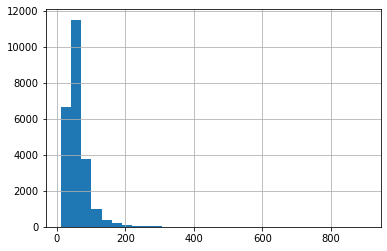

In [43]:
#код ревьюера
data2 = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
(data2['total_area']).hist(bins=30);

In [44]:
data.shape[0] / data2.shape[0]

0.9679311363348665

### Посчитайте и добавьте в таблицу новые столбцы

При исследовании рынка недвижимости используют такой показатель, как стоимость квадратного метра. 

In [45]:
data['price_per_meter'] = data['last_price'] / data['total_area'] 
data['price_per_meter'] = data['price_per_meter'].astype('int')

Вытащим из даты публикации объявления отдельно день недели, месяц и год, так как они могут иметь влияние на стоимость квартиры.


In [46]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

Для покупателей обычно имеет значение, на каком этаже находится квартира на первом, последнем или другом.
Добавим столбец, который будет охарактеризует расположение квартиры в этом разрезе.

In [47]:
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

data['floor_category'] = data.apply(floor_category, axis=1) 

data['floor_category'].value_counts() 

другой       16844
последний     3224
первый        2871
Name: floor_category, dtype: int64

важное значение имеет соотношение площадей в квартире.

In [48]:
data['living_ratio'] = (data['living_area'] / data['total_area']).round(2) 
data['kitchen_ratio'] = (data['kitchen_area'] / data['total_area']).round(2) 

In [49]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,total_areat,price_mln,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_category,living_ratio,kitchen_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,NaN,108.00,13.000,120370,3,3,2019,другой,0.47,0.23
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,81.0,40.40,3.350,82920,1,12,2018,первый,0.46,0.27
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,558.0,56.00,5.196,92785,3,8,2015,другой,0.61,0.15
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,121.0,100.00,10.000,100000,1,6,2018,другой,0.32,0.41
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,55.0,30.40,2.890,95065,0,9,2018,другой,0.47,0.30
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,155.0,37.30,3.700,99195,3,11,2017,другой,0.28,0.39
7,5,7915000,71.60,2019-04-18,2,2.65,24,41.20,22,False,...,NaN,71.60,7.915,110544,3,4,2019,другой,0.58,0.26
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,189.0,33.16,2.900,87454,2,5,2018,другой,0.47,0.27
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,289.0,61.00,5.400,88524,6,2,2017,другой,0.71,0.11
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,137.0,39.60,5.050,127525,3,11,2017,другой,0.51,0.21


Были рассчитаны и добавлены в таблицу важные параметры для анализа:

цена квадратного метра;
день недели, месяц и год публикации объявления;
категория этажа квартиры;
соотношение жилой и общей площади, а также отношение площади кухни к общей.

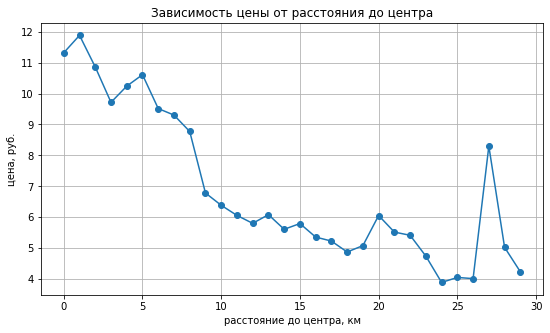

In [50]:
data['city_сenters_nearest_km'] = (data['city_centers_nearest'] / 1000).round() 

data_spb = (data.loc[data['locality_name'] == 'Санкт-Петербург']
                          .groupby('city_сenters_nearest_km')['price_mln']
                          .mean())

data_spb.plot(x='city_сenters_nearest_km', 
                            y=('price_mln', 'mean'), 
                            style='o-', 
                            figsize=(9,5), 
                            grid=True)

plt.title('Зависимость цены от расстояния до центра')
plt.xlabel('расстояние до центра, км')
plt.ylabel('цена, руб.');

### Проведите исследовательский анализ данных

# 4.1. Параметры объектов

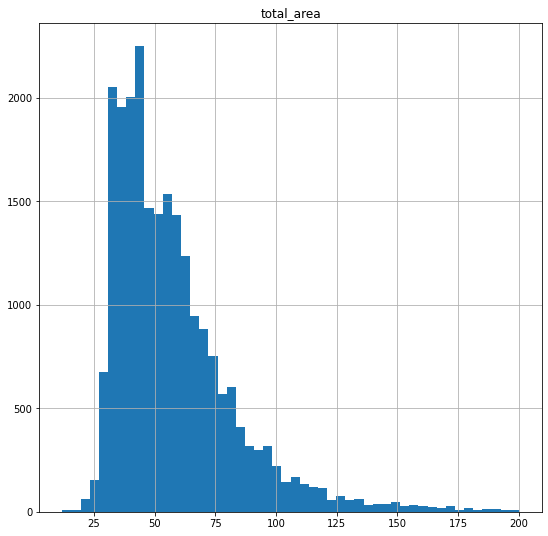

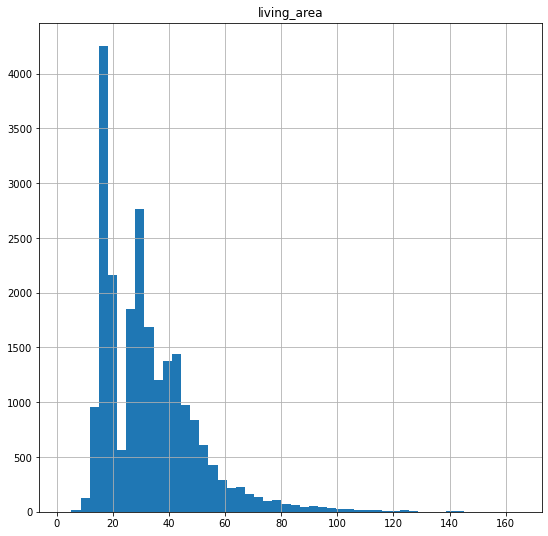

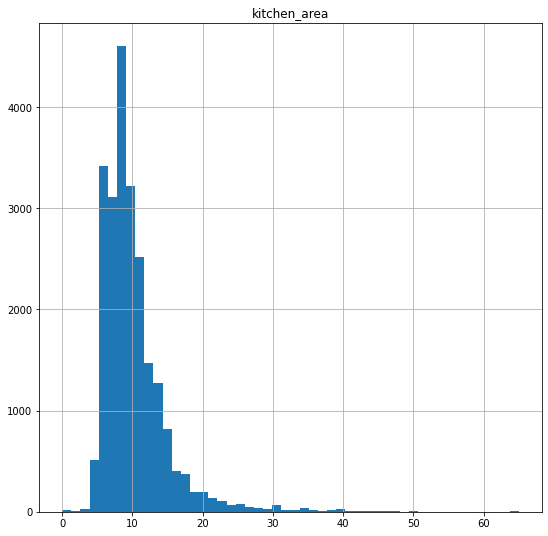

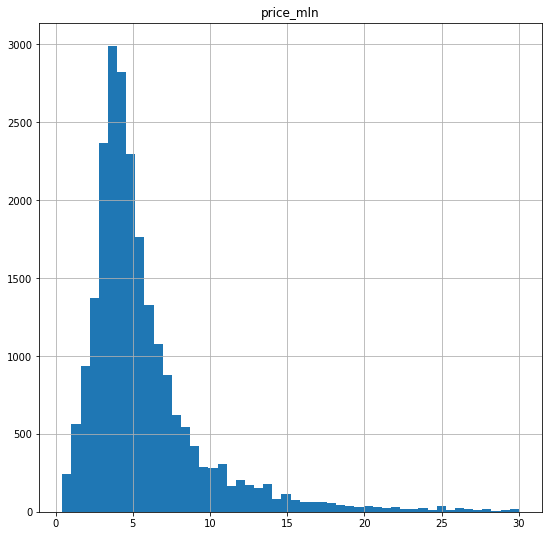

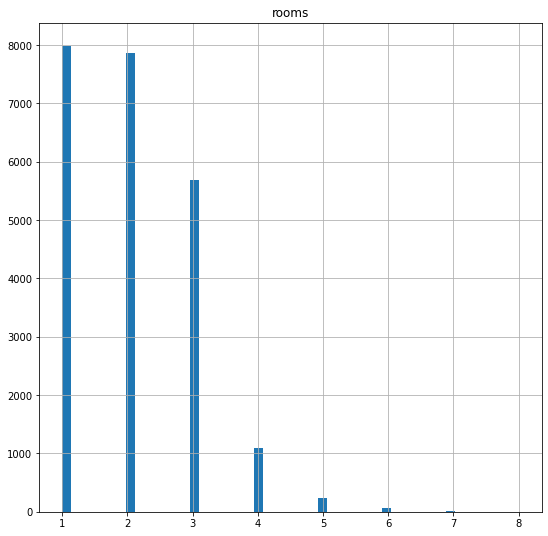

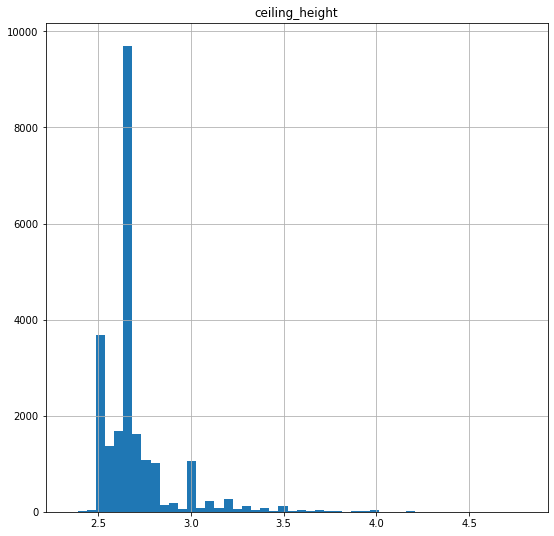

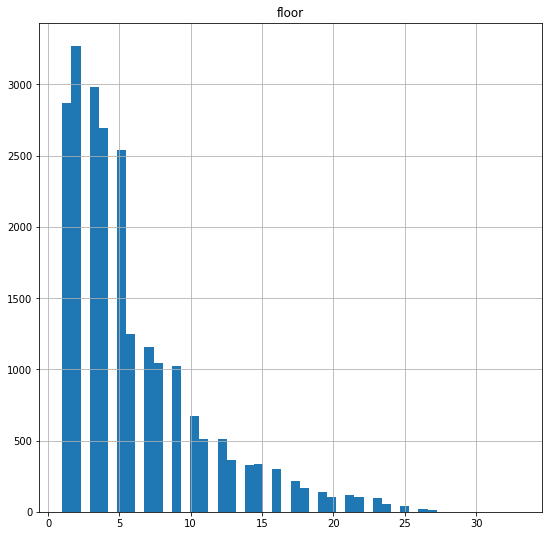

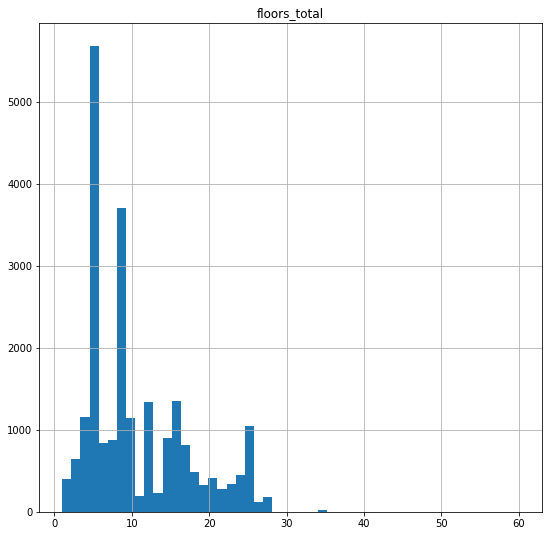

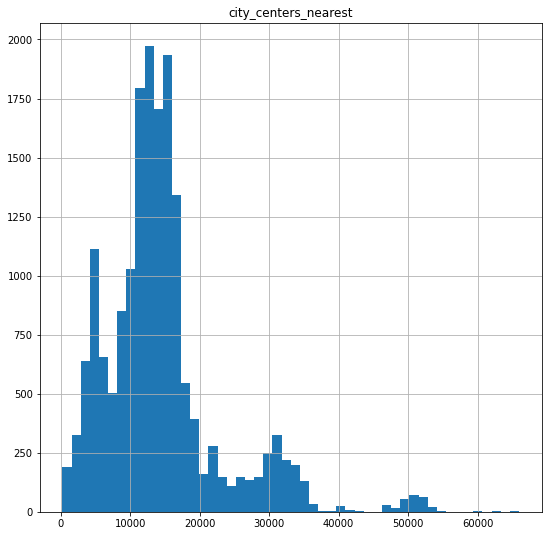

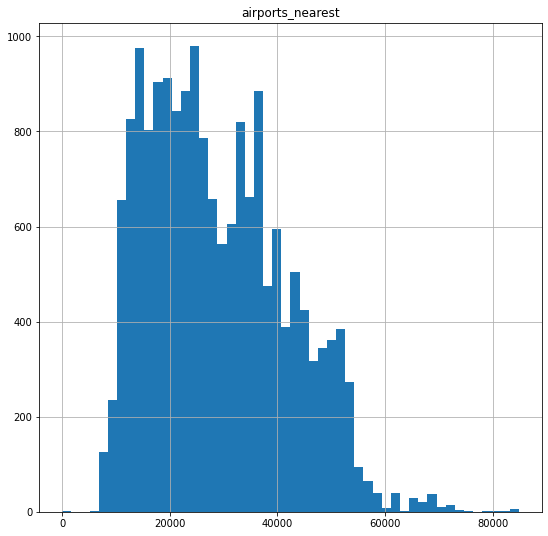

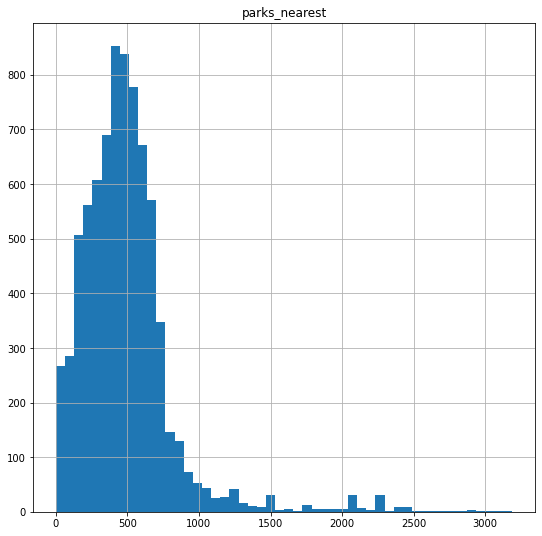

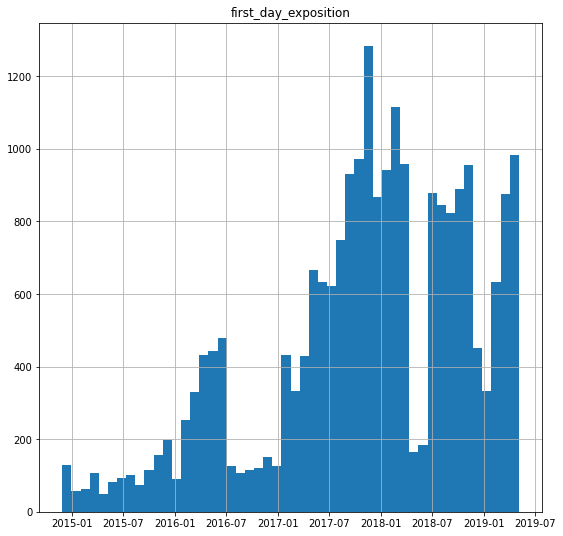

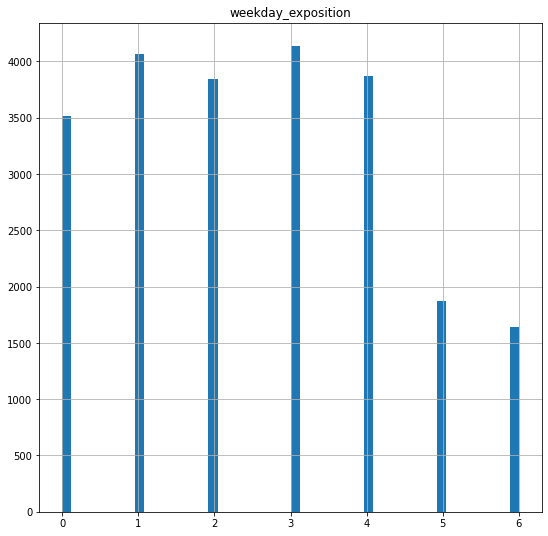

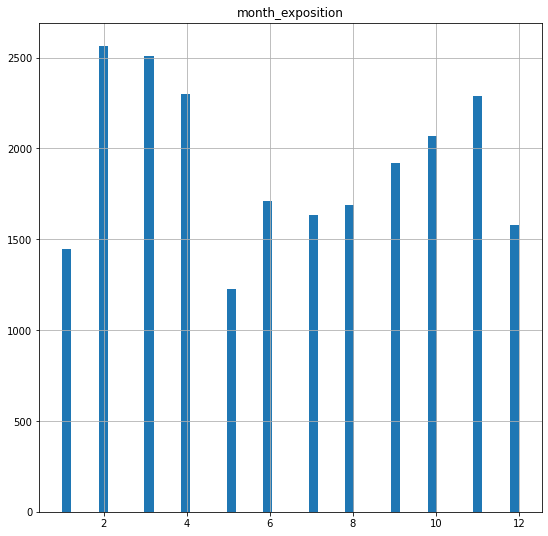

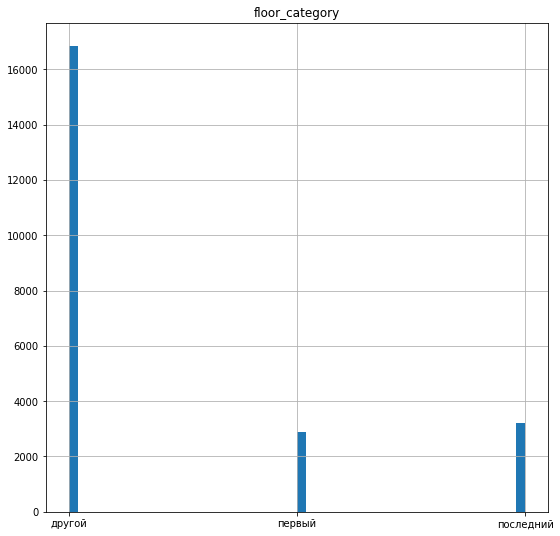

In [51]:
def table_hist(data, row):
    for value in row:
        data[value].hist(bins=50, figsize=(9,9)).set_title(value)
        plt.show()
        
table_hist(data, ['total_area','living_area','kitchen_area', 'price_mln', 'rooms', 
                  'ceiling_height', 'floor', 'floors_total', 'city_centers_nearest', 
                  'airports_nearest','parks_nearest', 'first_day_exposition',
                'weekday_exposition', 'month_exposition','floor_category' ])

Квартиры на первом этаже назначают самую маленькую цену, квартиру на последнем этаже можно продать чуть дороже, а квартиры на других этажах имеют самую большую стоимость.

Нельзя утверждать, что день недели и месяц размещения объявления значимо влияют на среднюю цену квартиры. Самые дорогие квартиры чаще выставляются по будням. Больше всего квартир выставляется в феврале.

В большинстве парки находятся в 500 метрах если их указывают


#  4.1. Параметры объектов

<AxesSubplot:title={'center':'Количество дней продажи'}>

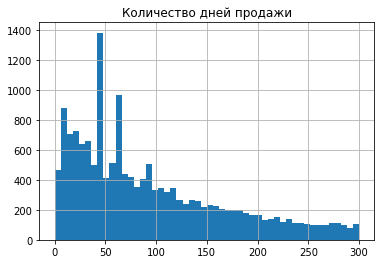

In [52]:
plt.title('Количество дней продажи')

data['days_exposition'].hist(bins=50, range=(0,300))

In [53]:
med_exp = data['days_exposition'].median()
mea_exp = data['days_exposition'].mean()
print(med_exp)
print(mea_exp)

95.0
179.72874717549587


Чаще всего квартиры продаются менее, чем за 80 дней.

Быстрыми можно считать продажи за менее 7 дней, а необчыно долгие можно считать больше полугода.

Медианное значение это 95 дней и среднее значение это 180 дней


# 4.3. Факторы больше всего влияют на общую (полную) стоимость объекта

In [54]:
data[['total_area','living_area','kitchen_area', 'rooms', 'price_mln']].corr().sort_values('price_mln', ascending=False)

,total_area,living_area,kitchen_area,rooms,price_mln
price_mln,0.785433,0.678420,0.596861,0.495276,1.000000
total_area,1.000000,0.930594,0.558050,0.792700,0.785433
living_area,0.930594,1.000000,0.330782,0.874913,0.678420
kitchen_area,0.558050,0.330782,1.000000,0.186093,0.596861
rooms,0.792700,0.874913,0.186093,1.000000,0.495276


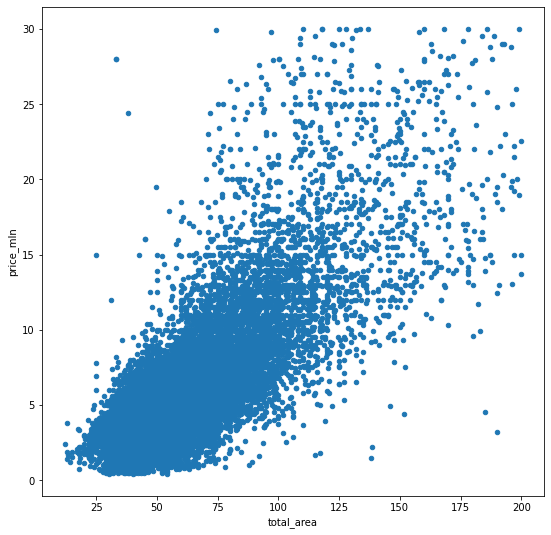

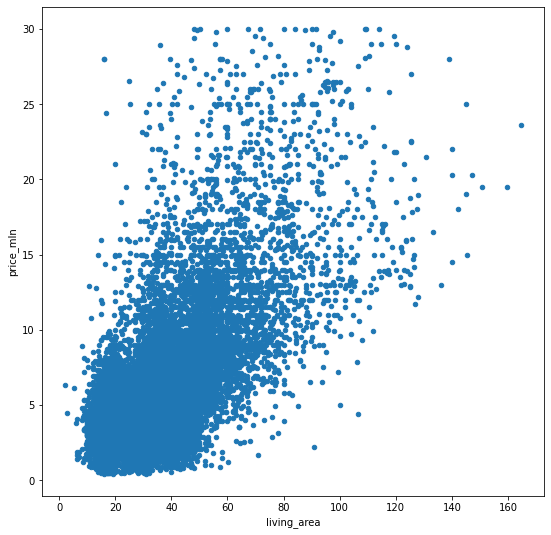

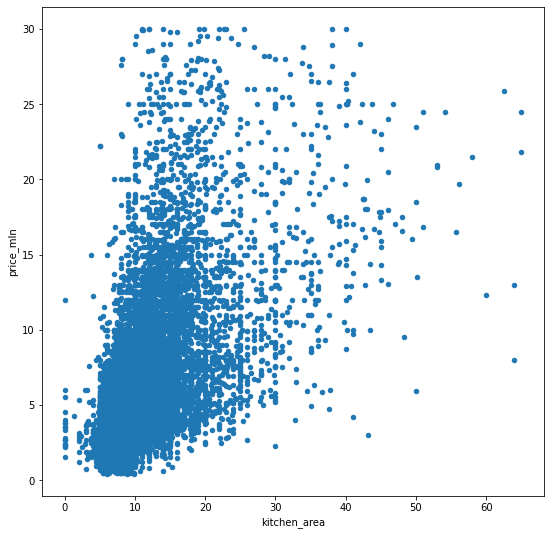

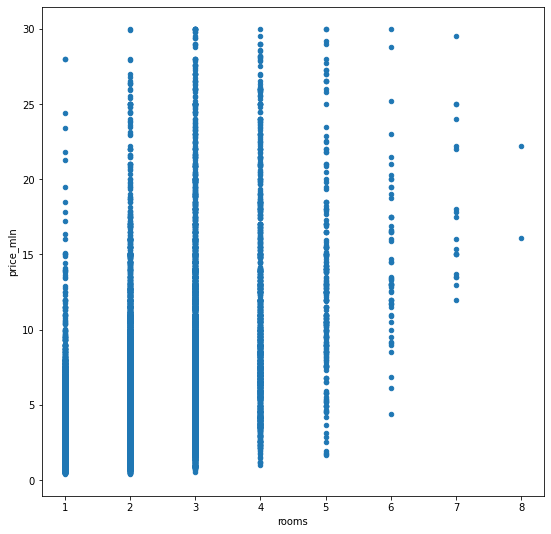

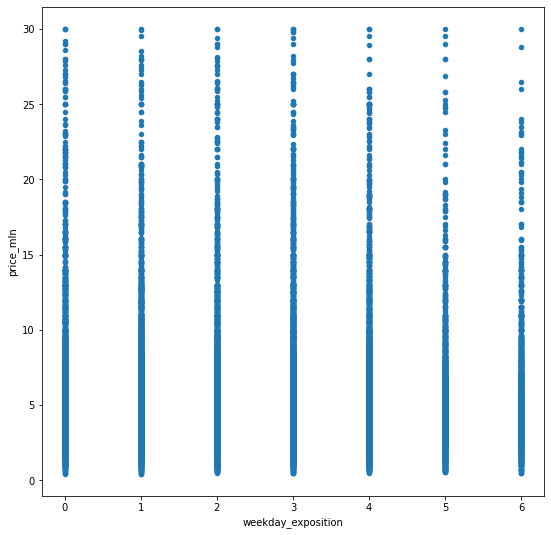

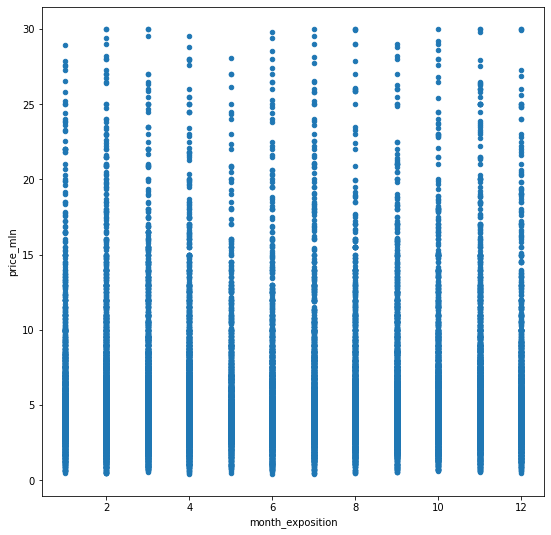

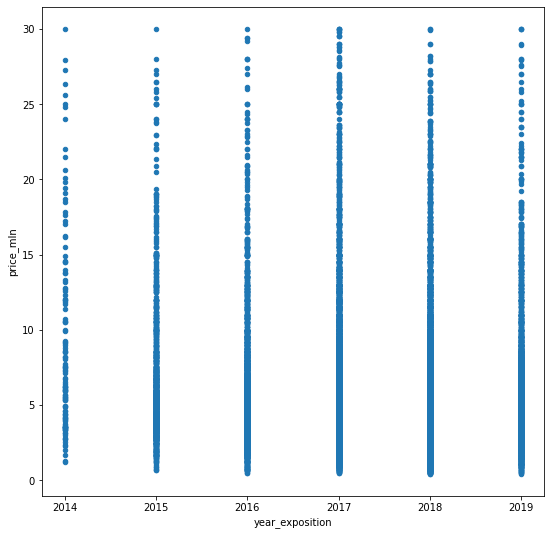

In [55]:
def plot_sc(data, col1, col2, color='#1f77b4'):
    for col in col1:
        data.plot.scatter(col, col2, figsize=(9,9), color=color)
        
# показываем графики по общей площади, комнатам и расстояниями до центра
plot_sc(data, ['total_area','living_area','kitchen_area', 'rooms','weekday_exposition', 'month_exposition', 'year_exposition'], 'price_mln')

In [56]:
data[['floor','weekday_exposition','month_exposition','year_exposition','price_mln']].corr().sort_values('price_mln', ascending=False)

,floor,weekday_exposition,month_exposition,year_exposition,price_mln
price_mln,0.086889,-0.021744,0.005573,-0.033648,1.000000
floor,1.000000,0.010957,0.019297,0.003019,0.086889
month_exposition,0.019297,0.009720,1.000000,-0.270189,0.005573
weekday_exposition,0.010957,1.000000,0.009720,-0.002936,-0.021744
year_exposition,0.003019,-0.002936,-0.270189,1.000000,-0.033648


<AxesSubplot:xlabel='floor_category'>

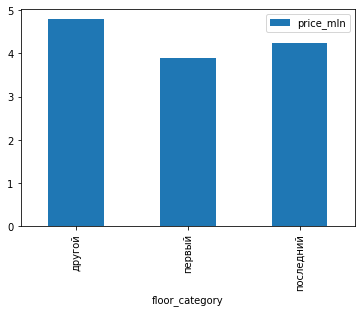

In [57]:
flrbar = pd.pivot_table(data, index = 'floor_category', values = 'price_mln', aggfunc = 'median')
flrbar.plot.bar()

<AxesSubplot:xlabel='weekday_exposition'>

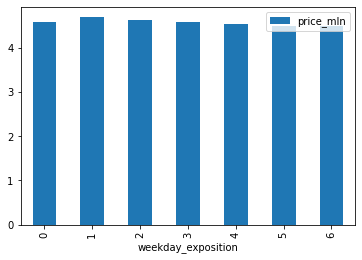

In [58]:
weekbar = pd.pivot_table(data, index = 'weekday_exposition', values = 'price_mln', aggfunc = 'median')
weekbar.plot.bar()

<AxesSubplot:xlabel='month_exposition'>

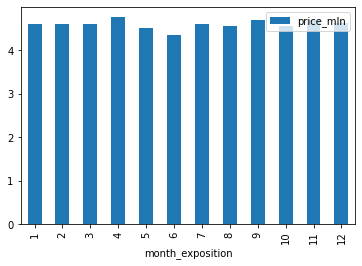

In [59]:
monthbar = pd.pivot_table(data, index = 'month_exposition', values = 'price_mln', aggfunc = 'median')
monthbar.plot.bar()

<AxesSubplot:xlabel='year_exposition'>

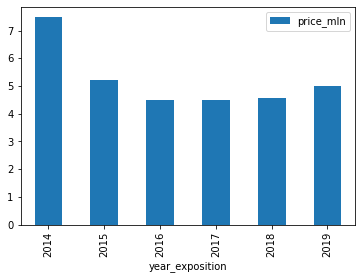

In [60]:
yearhbar = pd.pivot_table(data, index = 'year_exposition', values = 'price_mln', aggfunc = 'median')
yearhbar.plot.bar()

На стоимость сильно влияет общий квадратный мерт квартиры(чем больше тем дороже) и этаж квартиры. Средне влияет жилая площадь и площадь квартиры.
На стоимость не влияет день, месяц когда квартира была выложена на сайт.
Больше всего на сайт было выложенно объявлений в 2017 и 2018 году. В декабре и январе выкладывается больше всех объявлений.
Большинство домов это до 5 этажей. Медианный этаж это 4.
В среднем объявления выкладывались в среду в июне в 2017 году. 

# 4.4. Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [61]:
price_top_city = (data.groupby('locality_name')
                  .agg({'price_per_meter':['count','mean']})
                  .round(2)
                  .sort_values(by=('price_per_meter', 'count'), ascending=False)
                  .head(10))
price_top_city

price_per_meter           
                            count       mean
locality_name                               
Санкт-Петербург             15132  110494.32
поселок Мурино                526   85029.06
поселок Шушары                433   78188.18
Всеволожск                    392   68617.55
Пушкин                        363  103065.88
Колпино                       336   75310.45
поселок Парголово             322   90448.00
Гатчина                       307   68745.69
деревня Кудрово               283   92296.75
Выборг                        237   58141.49

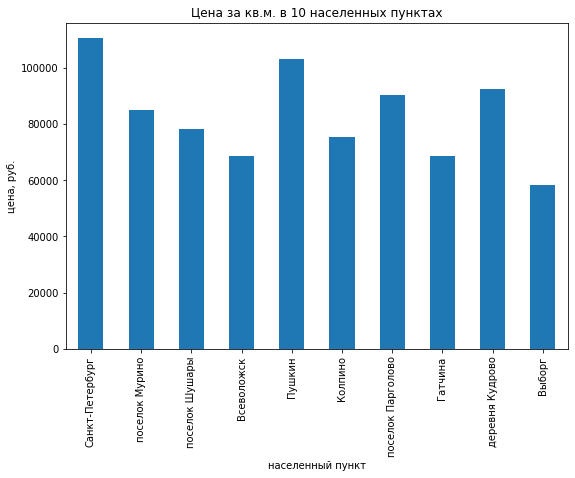

In [62]:
price_top_city[('price_per_meter', 'mean')].plot(kind='bar', figsize=(9,6))
plt.title('Цена за кв.м. в 10 населенных пунктах')
plt.xlabel('населенный пункт')
plt.ylabel('цена, руб.');

Дороже всего квадратный метр стоит в Санкт-Петербурге, в среднем 114 тыс. руб. На втором месте - Пушкин (103 тыс. руб.), на третьем - Кудрово (92,5 тыс. руб.) Наименьшая цена за квадратный метр - в Выборге (58 тыс. руб.), Всеволожске и Гатчине (68,7 и 68,6 тыс. руб.)

# 4.5. Стоимость объектов в Санкт-Петербургe

In [63]:
data_cen = data.query('locality_name == "Санкт-Петербург"')
display(data_cen)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,total_areat,price_mln,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_category,living_ratio,kitchen_ratio,city_сenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,108.00,13.000,120370,3,3,2019,другой,0.47,0.23,16.0
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,56.00,5.196,92785,3,8,2015,другой,0.61,0.15,14.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,100.00,10.000,100000,1,6,2018,другой,0.32,0.41,8.0
7,5,7915000,71.60,2019-04-18,2,2.65,24,41.20,22,False,...,71.60,7.915,110544,3,4,2019,другой,0.58,0.26,12.0
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,61.00,5.400,88524,6,2,2017,другой,0.71,0.11,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000,35.30,2018-02-28,1,2.86,15,16.30,4,False,...,35.30,3.550,100566,2,2,2018,другой,0.46,0.26,16.0
23690,3,5500000,52.00,2018-07-19,2,2.65,5,31.00,2,False,...,52.00,5.500,105769,3,7,2018,другой,0.60,0.12,6.0
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.30,7,False,...,72.90,9.470,129903,3,10,2016,другой,0.55,0.15,4.0
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,133.81,9.700,72490,1,3,2017,другой,0.55,0.10,4.0


array([[<AxesSubplot:title={'center':'city_сenters_nearest_km'}>]],
      dtype=object)

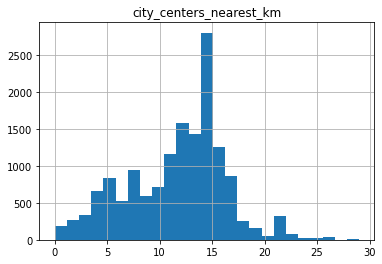

In [64]:
data_cen.hist('city_сenters_nearest_km', bins=25)

In [65]:
data_twnt = data_cen.query('city_сenters_nearest_km < 20')

In [66]:
display(data_twnt)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,total_areat,price_mln,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_category,living_ratio,kitchen_ratio,city_сenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,108.00,13.000,120370,3,3,2019,другой,0.47,0.23,16.0
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,56.00,5.196,92785,3,8,2015,другой,0.61,0.15,14.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,100.00,10.000,100000,1,6,2018,другой,0.32,0.41,8.0
7,5,7915000,71.60,2019-04-18,2,2.65,24,41.20,22,False,...,71.60,7.915,110544,3,4,2019,другой,0.58,0.26,12.0
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,61.00,5.400,88524,6,2,2017,другой,0.71,0.11,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000,35.30,2018-02-28,1,2.86,15,16.30,4,False,...,35.30,3.550,100566,2,2,2018,другой,0.46,0.26,16.0
23690,3,5500000,52.00,2018-07-19,2,2.65,5,31.00,2,False,...,52.00,5.500,105769,3,7,2018,другой,0.60,0.12,6.0
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.30,7,False,...,72.90,9.470,129903,3,10,2016,другой,0.55,0.15,4.0
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,133.81,9.700,72490,1,3,2017,другой,0.55,0.10,4.0


<AxesSubplot:xlabel='city_сenters_nearest_km'>

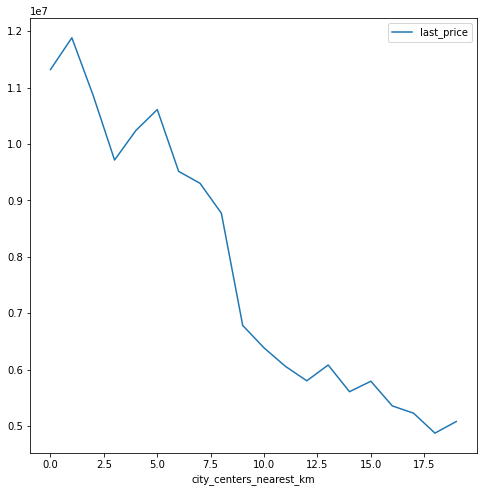

In [67]:
data_twnt.pivot_table(index='city_сenters_nearest_km', 
                               values='last_price', 
                               aggfunc='mean').plot(figsize=(8,8))

Средняя цена падает на 3 км и дальше возростает до 8 километра.

Стоимость объектов прямо зависит от расстояния до центра города, чем ближе тем дороже

### Общий вывод

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>],
       [<AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>,
        <AxesSubplot:title={'center':'parks_around_3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>],
       [<AxesSubplot:title={'center':'ponds_around_3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_expositio

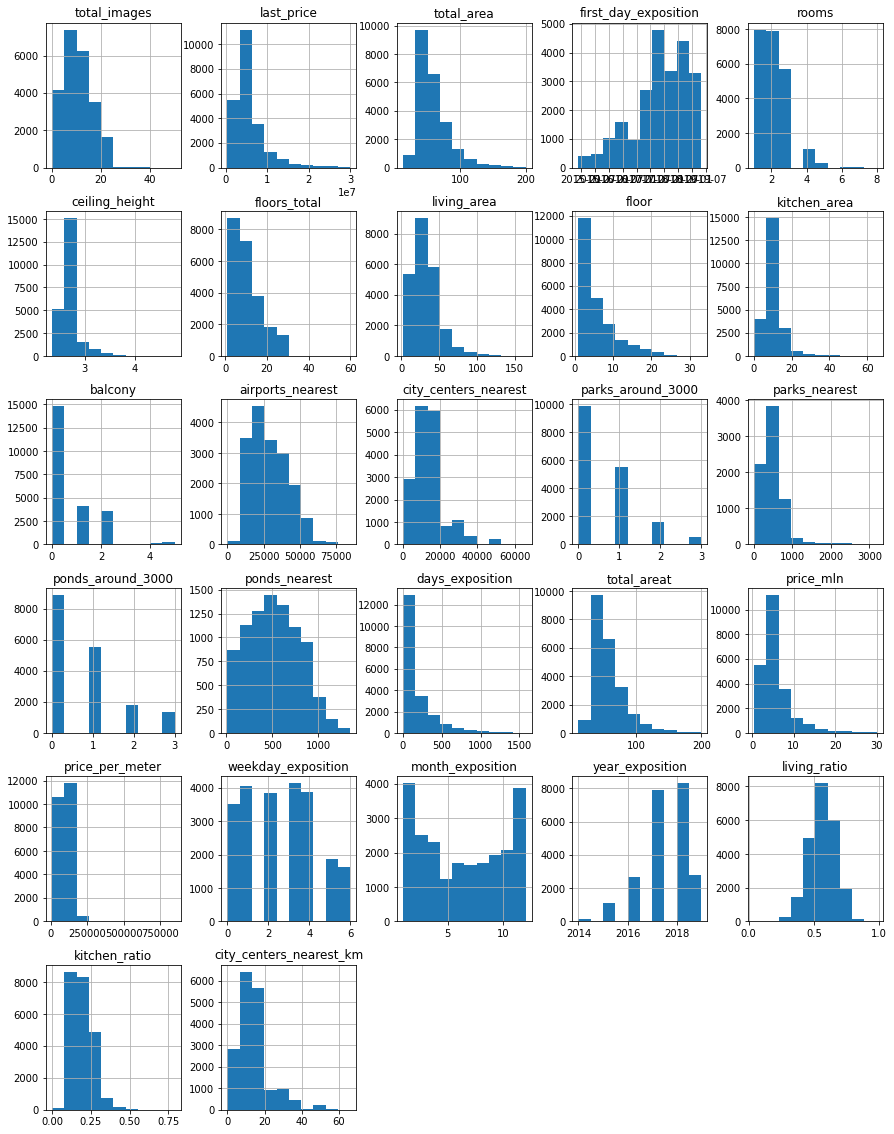

In [68]:
 data.hist(figsize=(15, 20))

Исследование проводилось по данным сервиса Яндекс Недвижимость о продаже квартир в Санкт-Петербурге и его окрестностях в 2014-2019гг.

Самые популярные квартиры имеют площадь 50 кв.м., стоят 5 млн руб, имеют высоту потолков 2,5 м и 1-2 комнаты.

На стоимость сильно влияет общий квадратный мерт квартиры(чем больше тем дороже) и этаж квартиры. Средне влияет жилая площадь и площадь квартиры.. Высокие цены наблюдались в 2017-2018 году.

Самая высокая стоимость квадратного метра в Санкт-Петербурге, самая низкая - в Выборге.
Дороже всего квадратный метр стоит в Санкт-Петербурге, в среднем 114 тыс. руб. На втором месте - Пушкин (103 тыс. руб.), на третьем - Кудрово (92 тыс. руб.) Наименьшая цена за квадратный метр - в Выборге (58 тыс. руб.), Всеволожске и Гатчине (68 тыс. руб.)

В радиусе 8 километров от центра Санкт-Петербурга располагаются самые дорогие квартиры. В основном их цена составляет от 9 до 12 млн ру. Факторы, влияющие на стоимость квартиры здесь в целом такие же, как и во всей рассматриваемой области, однако здесь теряет свое значение близость к центру.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [X]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [X]  посчитано и добавлено в таблицу: месяц публикации объявления
- [X]  посчитано и добавлено в таблицу: год публикации объявления
- [X]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [X]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [X]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [X]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [X]  в каждом этапе есть промежуточные выводы
- [X]  есть общий вывод